In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
#plt.style.use("seaborn.whitegrid")

import seaborn as sns



import warnings
warnings.filterwarnings('ignore')

In [114]:
train_df = pd.read_csv("/Users/jyotsana/Downloads/train.csv" , engine="python")


In [115]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [116]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [117]:
print(train_df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [118]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [119]:
#The default setting of "describe" skips variables of type object. 
#We can apply the method "describe" on the variables of type 'object' as follows
train_df.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Kirkland, Rev. Charles Leonard",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


In [120]:
train_df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [121]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [122]:
train_df.shape

(891, 12)

In [123]:
# Calculate the number of categorical and the number of numerical
categorical = [var for var in train_df.columns if train_df[var].dtypes == 'object']
print(len(categorical))

numerical = [var for var in train_df.columns if train_df[var].dtypes != 'object']
print(len(numerical))

5
7


In [124]:
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


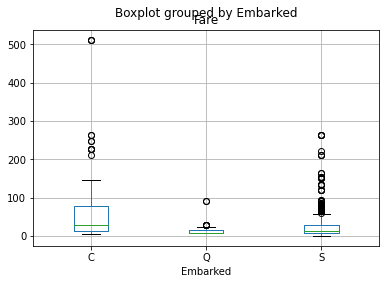

In [125]:
train_df.boxplot(column="Fare" , by="Embarked")
plt.show()

In [126]:
train_df["Embarked"]= train_df["Embarked"].fillna("C")

In [127]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [128]:
train_df["Age"]=train_df["Age"].fillna(np.mean(train_df["Age"]))

In [129]:
duplicate = train_df[train_df.duplicated()]

In [130]:
duplicate.shape

(0, 12)

In [136]:
#FUNCTION TO IDENTIFY OUTLIERS
#from collections import counter
import collections
def detect_outliers(df,features):
    outlier_indices=[]
    
    for c in features:
        Q1=np.percentile(df[c] , 25)
        Q3=np.percentile(df[c] , 75)
        IQR = Q3-Q1
        outlier_step= IQR*1.5
        outlier_list_col=df[(df[c]<Q1 - outlier_step) | (df[c]>Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices= collections.Counter(outlier_indices)
    multiple_outliers=(i for i, v in outlier_indices.items() if v>2)
    
    return multiple_outliers

In [ ]:
#We must start by cleaning the data a bit, removing outliers 
#One easy way to remove these all at once is to cut outliers; 
#we'll do this via a robust sigma-clipping operation:
quartiles = np.percentile(df[c], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

In [ ]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [137]:
train_df.loc[detect_outliers(train_df,["Age","SibSp","Parch","Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.000000,4,1,382652,29.1250,NaN,Q
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.000000,4,2,347082,31.2750,NaN,S
164,165,0,3,"Panula, Master. Eino Viljami",male,1.000000,4,1,3101295,39.6875,NaN,S
268,269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.000000,0,1,PC 17582,153.4625,C125,S
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.000000,1,2,113781,151.5500,C22 C26,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.920000,1,2,113781,151.5500,C22 C26,S
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.000000,5,2,CA 2144,46.9000,NaN,S
438,439,0,1,"Fortune, Mr. Mark",male,64.000000,1,4,19950,263.0000,C23 C25 C27,S
587,588,1,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.000000,1,1,13567,79.2000,B41,C


In [138]:
train_df.shape
train_df = train_df.drop(detect_outliers(train_df,["Age","SibSp","Parch","Fare"]),axis=0).reset_index(drop = True) 
train_df.shape

(866, 12)

In [139]:
def bar_plot(variable):
    var=train_df[variable]
    varValue= var.value_counts()
    
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}:\n{}".format(variable,varValue))

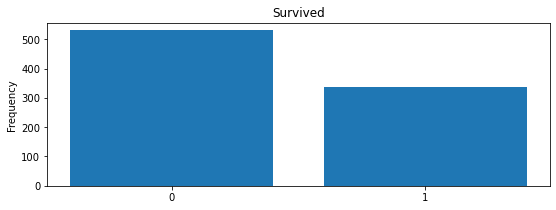

Survived:
0    530
1    336
Name: Survived, dtype: int64


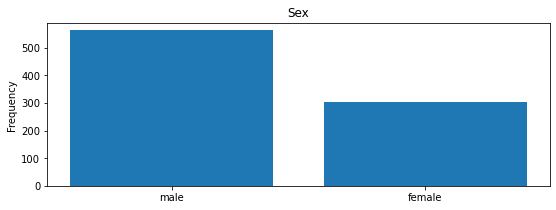

Sex:
male      562
female    304
Name: Sex, dtype: int64


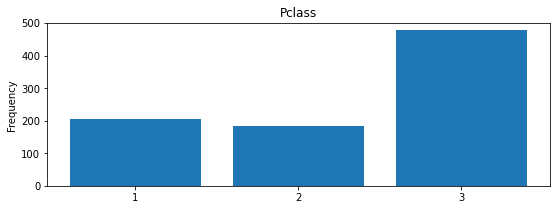

Pclass:
3    477
1    205
2    184
Name: Pclass, dtype: int64


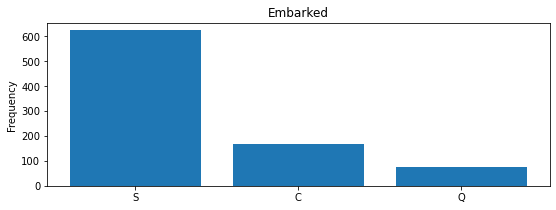

Embarked:
S    623
C    167
Q     76
Name: Embarked, dtype: int64


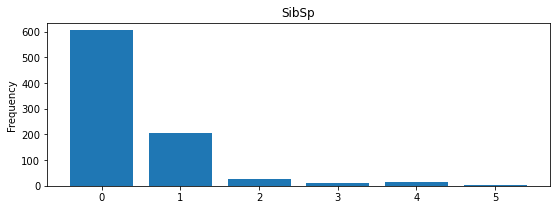

SibSp:
0    605
1    204
2     28
4     14
3     11
5      4
Name: SibSp, dtype: int64


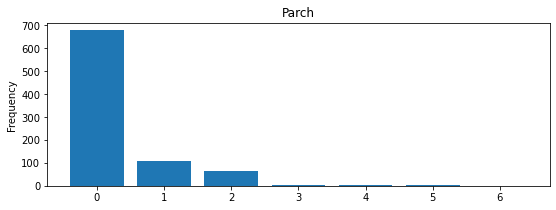

Parch:
0    678
1    110
2     64
5      5
3      5
4      3
6      1
Name: Parch, dtype: int64


In [140]:
category1= ["Survived","Sex","Pclass","Embarked","SibSp","Parch"]
for c in category1:
    bar_plot(c)

In [141]:
def plot_hist(variable):
    plt.figure(figsize=(9,3))
    plt.hist(train_df[variable] , bins=50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{}Distribution with hist".format(variable))
    plt.show()

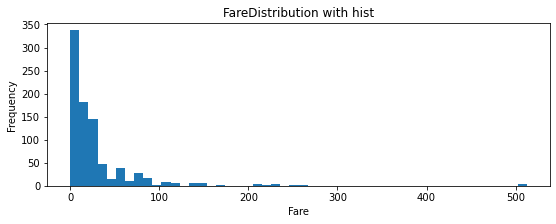

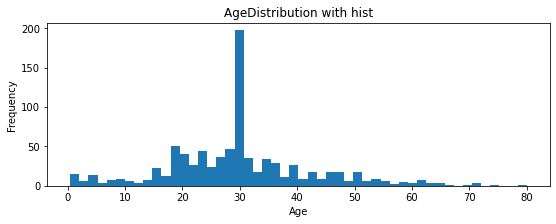

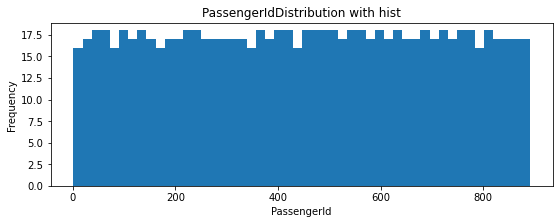

In [142]:
numericVar= ["Fare","Age","PassengerId"]
for n in numericVar:
    plot_hist(n)

In [143]:
#Pclass vs Survived
train_df[["Pclass","Survived"]].groupby(["Pclass"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Pclass,Survived
0,1,0.634146
1,2,0.472826
2,3,0.249476


In [144]:
#Sex vs Survived
train_df[["Sex","Survived"]].groupby(["Sex"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Sex,Survived
0,female,0.753289
1,male,0.190391


In [145]:
#SibSp vs Survived
train_df[["SibSp","Survived"]].groupby(["SibSp"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,SibSp,Survived
1,1,0.539216
2,2,0.464286
0,0,0.343802
4,4,0.214286
3,3,0.181818
5,5,0.000000


In [146]:
#Parch vs Survived
train_df[["Parch","Survived"]].groupby(["Parch"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Parch,Survived
3,3,0.600000
2,2,0.578125
1,1,0.563636
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [147]:
#Embarked vs Survived
train_df[["Embarked","Survived"]].groupby(["Embarked"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Embarked,Survived
0,C,0.556886
1,Q,0.394737
2,S,0.341894


In [148]:
#we might like to go one step deeper and look at survival by both sex and, say, class. 
#Using the vocabulary of GroupBy, we might proceed using something like this: 
#we group by class and gender, select survival, apply a mean aggregate, 
#combine the resulting groups, and then unstack the hierarchical index to reveal the hidden multidimensionality
train_df.groupby(['Sex', 'Pclass'])['Survived'].aggregate('mean').unstack()

Pclass,1,2,3
Sex,,,
female,0.977528,0.921053,0.517986
male,0.370690,0.157407,0.139053


In [149]:
#Just as in the GroupBy, the grouping in pivot tables can be specified with multiple levels, 
#and via a number of options. For example, we might be interested in looking at age as a third dimension. 
#We'll bin the age using the pd.cut function:
Age = pd.cut(train_df['Age'], [0, 18, 80])
train_df.pivot_table('Survived', ['Sex', age], 'Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   1.000000  1.000000  0.536585
       (18, 80]  0.974684  0.903226  0.510204
male   (0, 18]   0.750000  0.600000  0.239130
       (18, 80]  0.357143  0.086022  0.123288

In [150]:
#We can apply the same strategy when working with the columns as well; 
#let's add info on the fare paid using pd.qcut to automatically compute quantiles:
Fare = pd.qcut(train_df['Fare'], 2)
train_df.pivot_table('Survived', ['Sex', Age], [Fare, 'Pclass'])

Fare            (-0.001, 13.646]                     (13.646, 512.329]  \
Pclass                         1         2         3                 1   
Sex    Age                                                               
female (0, 18]               NaN  1.000000  0.777778          1.000000   
       (18, 80]              NaN  0.875000  0.561404          0.974684   
male   (0, 18]               NaN  0.000000  0.260870          0.750000   
       (18, 80]              0.0  0.105263  0.107884          0.377358   

Fare                                 
Pclass                  2         3  
Sex    Age                           
female (0, 18]   1.000000  0.347826  
       (18, 80]  0.921053  0.439024  
male   (0, 18]   0.818182  0.217391  
       (18, 80]  0.055556  0.196078

In [151]:
#The aggfunc keyword controls what type of aggregation is applied, which is a mean by default. 
#As in the GroupBy, 
#the aggregation specification can be a string representing one of several common choices
#(e.g., 'sum', 'mean', 'count', 'min', 'max', etc.) or a function that implements an aggregation (e.g., np.sum(), min(), sum(), etc.).
#Additionally, it can be specified as a dictionary mapping a column to any of the above desired options:
train_df.pivot_table(index='Sex', columns='Pclass',
                    aggfunc={'Survived':sum, 'Fare':'mean'})

Fare                       Survived        
Pclass           1          2          3        1   2   3
Sex                                                      
female  101.816339  21.970121  14.771824       87  70  72
male     62.591056  19.741782  11.653584       43  17  47

In [152]:
#At times it's useful to compute totals along each grouping. This can be done via the margins keyword:
train_df.pivot_table('Survived', index='Sex', columns='Pclass', margins=True)

Pclass,1,2,3,All
Sex,,,,
female,0.977528,0.921053,0.517986,0.753289
male,0.370690,0.157407,0.139053,0.190391
All,0.634146,0.472826,0.249476,0.387991


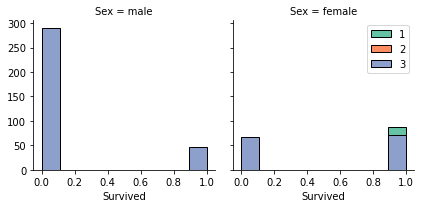

In [153]:
bins = np.linspace(train_df.Survived.min(), train_df.Survived.max(), 10)
g = sns.FacetGrid(train_df, col="Sex", hue="Pclass", palette="Set2", col_wrap=2)
g.map(plt.hist, 'Survived', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

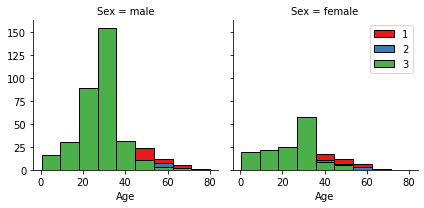

In [154]:
bins = np.linspace(train_df.Age.min(), train_df.Age.max(), 10)
g = sns.FacetGrid(train_df, col="Sex", hue="Pclass", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

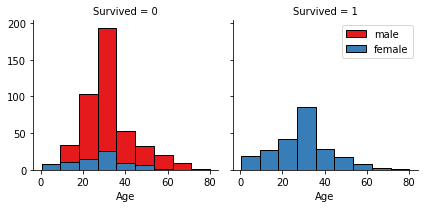

In [155]:
bins = np.linspace(train_df.Age.min(), train_df.Age.max(), 10)
g = sns.FacetGrid(train_df, col="Survived", hue="Sex", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()


In [156]:
train_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.006770,-0.035794,0.009941,-0.059455,0.007248,0.032007
Survived,-0.006770,1.000000,-0.332715,-0.088650,0.031316,0.107628,0.273395
Pclass,-0.035794,-0.332715,1.000000,-0.323801,0.046003,0.034206,-0.548342
Age,0.009941,-0.088650,-0.323801,1.000000,-0.249420,-0.187441,0.092178
SibSp,-0.059455,0.031316,0.046003,-0.249420,1.000000,0.365628,0.112261
Parch,0.007248,0.107628,0.034206,-0.187441,0.365628,1.000000,0.144872
Fare,0.032007,0.273395,-0.548342,0.092178,0.112261,0.144872,1.000000


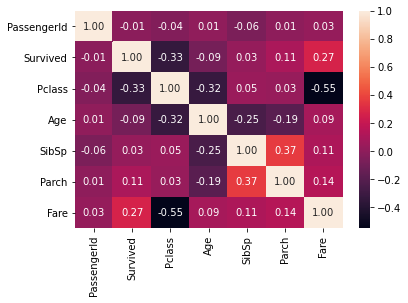

In [157]:
sns.heatmap(train_df.corr(), annot=True, fmt=".2f")
plt.show()

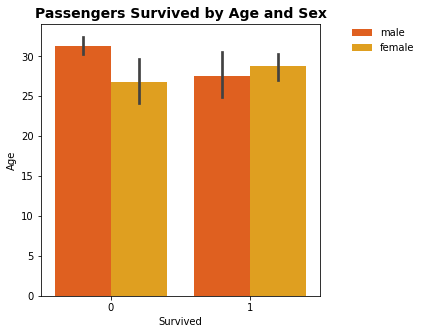

In [164]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.barplot(y='Age', x='Survived', hue='Sex', data=train_df, palette='autumn')
ax.set_title('Passengers Survived by Age and Sex', fontsize=14, fontweight='bold')
ax.set(xlabel='Survived', ylabel='Age')
ax.legend(bbox_to_anchor=(1.1, 1.), borderaxespad=0., frameon=False)